<a href="https://colab.research.google.com/github/LeonZou7/TF-Study-Log/blob/master/Dropout_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

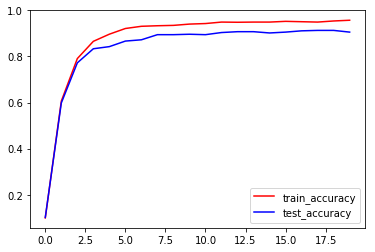

In [13]:
'''
Example 5: Dropout - Classification
利用Dropout解决过拟合问题，提高预测准确率
Dropout会根据设定的比例随机舍弃一部分数据，这样可有效减小Overfitting的影响
使用sklearn中的数据集进行测试
'''
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


def add_layer(inputs, in_size, out_size, layer_name, activation_function=None):
  # 定义两个参数并初始化，Weights是随机矩阵
  Weights = tf.Variable(tf.random_normal([in_size, out_size]))
  # biaes设置为一个数列，并且初始化时不推荐为0
  biaes = tf.Variable(tf.zeros([1, out_size]) + 0.1)
  
  # 输出的预测值 = inputs * Weights + biaes
  Wx_plus_b = tf.matmul(inputs, Weights) + biaes
  # 使用Dropout来改善预测值
  Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
  
  # 使用激活函数
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
    
  return outputs


def compute_accuracy(v_xs, v_ys):
  global prediction
  y_pre = sess.run(prediction, feed_dict={xs:v_xs, keep_prob:1})
  correct_prediction = tf.equal(tf.argmax(y_pre, 1), tf.argmax(v_ys, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  result = sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys, keep_prob:1})
  return result


# 定义输入值，不规定数据量（None），但规定数据类型和形式（8 x 8 =64）
xs = tf.placeholder(tf.float32, [None, 64])
# 定义输出值， 不规定数据量（None），但规定数据类型和形式
ys = tf.placeholder(tf.float32, [None, 10])
# Dropout保持百分比，表明有多少数据保留
keep_prob = tf.placeholder(tf.float32)
# 有一个隐藏层l1，使用tanh作为激活函数
l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
# 在输出层使用专门做classification的softmax激活函数
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                              reduction_indices=[1])) # loss

train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

train_acc = []
test_acc = []

x_axis = range(0, 20)
train_line = train_acc
test_line = test_acc

for i in range(1000):
  sess.run(train_step, feed_dict={xs:X_train, ys:y_train, keep_prob:0.5})
  if i % 50 == 0:
    train_now = compute_accuracy(X_train, y_train);
    test_now = compute_accuracy(X_test, y_test);
    train_acc.append(train_now);
    test_acc.append(test_now);
    # print(train_now)
    # print(test_now)
    # print('-----------------------------------')
    
plt.plot(x_axis, train_line, color='red', label='train_accuracy')
plt.plot(x_axis, test_line, color='blue', label='test_accuracy')
plt.legend()
plt.show()

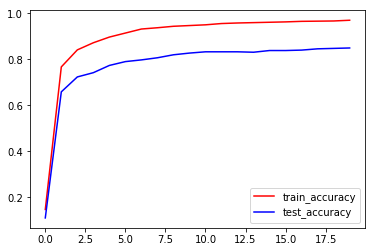

In [11]:
'''
Example 5: Dropout - Classification
对照：未使用Dropout
'''
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


def add_layer(inputs, in_size, out_size, layer_name, activation_function=None):
  # 定义两个参数并初始化，Weights是随机矩阵
  Weights = tf.Variable(tf.random_normal([in_size, out_size]))
  # biaes设置为一个数列，并且初始化时不推荐为0
  biaes = tf.Variable(tf.zeros([1, out_size]) + 0.1)
  
  # 输出的预测值 = inputs * Weights + biaes
  Wx_plus_b = tf.matmul(inputs, Weights) + biaes
  
  # 使用激活函数
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
    
  return outputs


def compute_accuracy(v_xs, v_ys):
  global prediction
  y_pre = sess.run(prediction, feed_dict={xs:v_xs})
  correct_prediction = tf.equal(tf.argmax(y_pre, 1), tf.argmax(v_ys, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  result = sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})
  return result


# 定义输入值，不规定数据量（None），但规定数据类型和形式（8 x 8 =64）
xs = tf.placeholder(tf.float32, [None, 64])
# 定义输出值， 不规定数据量（None），但规定数据类型和形式
ys = tf.placeholder(tf.float32, [None, 10])
# 有一个隐藏层l1，使用tanh作为激活函数
l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
# 在输出层使用专门做classification的softmax激活函数
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                              reduction_indices=[1])) # loss

train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

train_acc = []
test_acc = []

x_axis = range(0, 20)
train_line = train_acc
test_line = test_acc

for i in range(1000):
  sess.run(train_step, feed_dict={xs:X_train, ys:y_train})
  if i % 50 == 0:
    train_now = compute_accuracy(X_train, y_train);
    test_now = compute_accuracy(X_test, y_test);
    train_acc.append(train_now);
    test_acc.append(test_now);
    # print(train_now)
    # print(test_now)
    # print('-----------------------------------')
    
plt.plot(x_axis, train_line, color='red', label='train_accuracy')
plt.plot(x_axis, test_line, color='blue', label='test_accuracy')
plt.legend()
plt.show()